# Data splitting 

In [1]:
# Import packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data 
original_data = pd.read_csv(r"data.csv", 
                   names=['sentiment','text'], header=None, encoding='latin-1')
print("Data info: \n",original_data.info) 

Data info: 
 <bound method DataFrame.info of          sentiment                                               text
0                0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1                0  is upset that he can't update his Facebook by ...
2                0  @Kenichan I dived many times for the ball. Man...
3                0    my whole body feels itchy and like its on fire 
4                0  @nationwideclass no, it's not behaving at all....
...            ...                                                ...
1048571          4           My GrandMa is making Dinenr with my Mum 
1048572          4  Mid-morning snack time... A bowl of cheese noo...
1048573          4  @ShaDeLa same here  say it like from the Termi...
1048574          4             @DestinyHope92 im great thaanks  wbuu?
1048575          4               cant wait til her date this weekend 

[1048576 rows x 2 columns]>


In [3]:
original_data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [4]:
original_data.isnull().sum()

sentiment    0
text         0
dtype: int64

In [5]:
original_data.sentiment.value_counts()

0    800000
4    248576
Name: sentiment, dtype: int64

<AxesSubplot:ylabel='sentiment'>

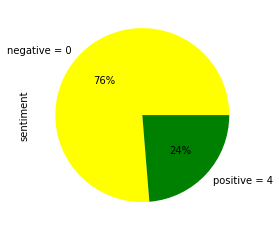

In [14]:
original_data.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', labels = ["negative = 0","positive = 4"], colors=["yellow", "green"])

In [7]:
labels = np.copy(original_data.sentiment)

In [8]:
# generate random floating numbers ranging from 0 to 1
rng = np.random.RandomState(42)
      
# randomly assign 50% of the datapoints to being unlabelled
# values less than 0.5 will be set as no labels
random_unlab_points = rng.rand(labels.shape[0]) < 0.5
print("Boolean values: \n", random_unlab_points[:10])
print("Number of trues: \n", sum(random_unlab_points))

Y = labels[random_unlab_points]
print("Original Y labels: \n", Y[:10])

# values less than 0.5 (True values) are set as -1 
labels[random_unlab_points] = -1

print("New Y labels: \n", labels[:10])  
print("Number of unlabeled datapoints: \n",list(labels).count(-1))

Boolean values: 
 [ True False False False  True  True  True False False False]
Number of trues: 
 523873
Original Y labels: 
 [0 0 0 0 0 0 0 0 0 0]
New Y labels: 
 [-1  0  0  0 -1 -1 -1  0  0  0]
Number of unlabeled datapoints: 
 523873


In [9]:
print("Original dataset: \n")
print(original_data.head())
print(" \n")

# make a copy of original data to work on
data_copy = original_data.copy()

# insert Boolean values into copy of dataframe
data_copy.insert(loc = 1,column = 'Boolean val',value = random_unlab_points)
print("Dataset with Boolean column: \n")
print(data_copy.head())
print(" \n")

# save a copy of dataframe with Boolean column to use later
new_data = data_copy.copy()

# keep only rows that have True values 
data_copy.drop(data_copy[data_copy['Boolean val'] == False].index, inplace = True)
# reset index
data_copy.reset_index(drop=True,inplace = True) 

# keep a copy of "original" unlabelled dataset
original_unlab = data_copy
print(" Data set with selected rows before assigning value -1 for True labels: \n")
print(original_unlab.head())

# save to csv file
original_unlab.to_csv(r"original_unlab.csv")

Original dataset: 

   sentiment                                               text
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  is upset that he can't update his Facebook by ...
2          0  @Kenichan I dived many times for the ball. Man...
3          0    my whole body feels itchy and like its on fire 
4          0  @nationwideclass no, it's not behaving at all....
 

Dataset with Boolean column: 

   sentiment  Boolean val                                               text
0          0         True  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0        False  is upset that he can't update his Facebook by ...
2          0        False  @Kenichan I dived many times for the ball. Man...
3          0        False    my whole body feels itchy and like its on fire 
4          0         True  @nationwideclass no, it's not behaving at all....
 

 Data set with selected rows before assigning value -1 for True labels: 

   sentiment  Boolean v

# Save the data on two separate files

In [10]:
# create new dataframe with some datapoint's labels = -1
new_data['sentiment'] = labels
new_data = new_data.drop(['Boolean val'],axis=1)
new_data.head()

,sentiment,text
0,-1,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,-1,"@nationwideclass no, it's not behaving at all...."


In [11]:
# 1.LABELLED DATA 
# filter data by column value 0 or 4
lab_data=new_data.loc[(new_data['sentiment']> -1)] 
# reset index
lab_data= lab_data.reset_index(drop=True)
# Save to csv file
lab_data.to_csv(r"labelled.csv")
lab_data.head()

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,@LOLTrish hey long time no see! Yes.. Rains a...
4,0,@Tatiana_K nope they didn't have it


In [12]:
# 2.UNLABELLED DATA 
# filter data by column value
unlab_data = new_data.loc[(new_data['sentiment']== -1)]
# reset index
unlab_data = unlab_data.reset_index(drop=True)
# Save to csv file
unlab_data.to_csv(r"unlabelled.csv") 
unlab_data.head()

,sentiment,text
0,-1,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,-1,"@nationwideclass no, it's not behaving at all...."
2,-1,@Kwesidei not the whole crew
3,-1,Need a hug
4,-1,spring break in plain city... it's snowing


In [13]:
# summarize the original dataset size
print('Original Dataset:', original_data.shape)
# summarize the labelled and unlabelled dataset size
print('Labeled Dataset:', lab_data.shape)
print('Unlabeled Dataset:', unlab_data.shape)


Original Dataset: (1048576, 2)
Labeled Dataset: (524703, 2)
Unlabeled Dataset: (523873, 2)
